In [1]:
from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
from sklearn.metrics import mean_squared_error

from echoes.esn import EchoStateNetwork

sns.set(context="notebook", style="whitegrid", font_scale=1.4, 
        rc={'grid.linestyle': '--', 
            'grid.linewidth': 0.8,})

In [2]:
# Prepare synthetic data 
traininglen, testlen = 500, 500
totallen = traininglen + testlen
x = np.linspace(0, 30*np.pi, totallen).reshape(-1,1)

inputs = np.sin(x)
outputs = np.cos(x)

inputs_train = inputs[: traininglen]
outputs_train = outputs[: traininglen]

inputs_test= inputs[traininglen:]
outputs_test = outputs[traininglen:]

In [3]:
esn = EchoStateNetwork(
    n_inputs=1,
    n_outputs=1,
    n_reservoir=20,
    spectral_radius=.95,
    leak_rate=.4,
    n_transient=100,
    teacher_forcing=False,
    regression_params={
        "method": "pinv",
    },
    random_seed=42
).fit(inputs_train, outputs_train)

training RMSE: 0.3967779896392324


In [4]:
prediction_test = esn.predict(inputs_test, mode="predictive")
print("test RSME:", 
      np.sqrt(mean_squared_error(prediction_test.flatten()[esn.n_transient:], # discard same transient as in training
                                 outputs_test[esn.n_transient:])))

test RSME: 8.011273955709626e-06


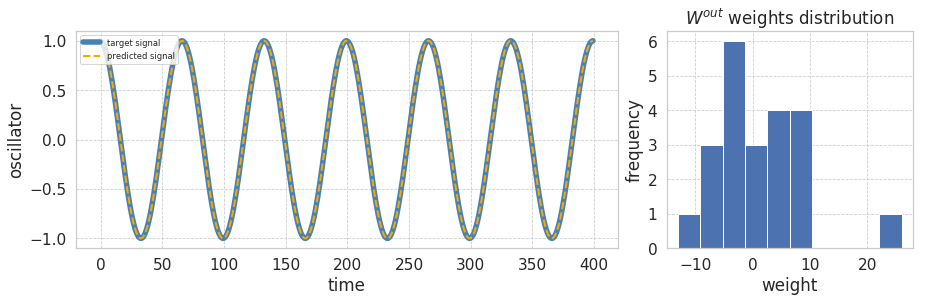

In [5]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, (1,2))
plt.plot(outputs_test[esn.n_transient:], label='target signal',
         color="steelblue", linewidth=5.5)
plt.plot(prediction_test[esn.n_transient:], label='predicted signal',
         linestyle='--', color="orange",  linewidth=2,)
plt.ylabel("oscillator")
plt.xlabel('time')
plt.legend(fontsize=("small"), loc=2)

plt.subplot(1, 3, 3)
plt.title(r"$W^{out}$ weights distribution")
plt.xlabel('weight')
plt.ylabel('frequency')
plt.hist(esn.W_out_.flat);